In [2]:
# Command to make `src` module available in notebook
# Details: https://stackoverflow.com/a/35273613

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


### Поиск аномалий во времени входа в систему

**Гипотезы:** 

1. Для каждого пользователя существует время его типичного входа в систему. 
2. То же верно для людей одной профессии

Имеет смысл рассматривать время как точку внутри дня и как точку внутри недели

In [13]:
from datetime import datetime

import numpy as np
import pandas as pd
import seaborn

from src.cert import (
    CERTDatasetVersion,
    CERTDataType,
    CERTDataType,
    load_cert_dataset_users_dataframe,
    load_dataframe,
)


In [4]:
users = load_cert_dataset_users_dataframe(version=CERTDatasetVersion.cert_3_2)
logon_activities = load_dataframe(
    data_type=CERTDataType.logon,
)


In [10]:
users.head()


,employee_name,user_id,email,role,business_unit,functional_unit,department,team,supervisor
0,Sara Indigo Berger,SIB0825,Sara.Indigo.Berger@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,5 - RegionalSales,Regan Kirestin Frye
1,Nerea Ingrid Good,NIG0433,Nerea.Ingrid.Good@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,2 - AssemblyDept,Hilel Colt Rush
2,Maggy Maryam Newman,MMN0579,Maggy.Maryam.Newman@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Dorian Dominic Burt
3,Asher Lucas Daniel,ALD0521,Asher.Lucas.Daniel@dtaa.com,Mathematician,1,2 - ResearchAndEngineering,1 - Research,3 - Lab,Elizabeth Josephine Gay
4,Jael Phyllis Contreras,JPC0464,Jael.Phyllis.Contreras@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,2 - RegionalSales,Brandon Vladimir Vaughan


In [9]:
def get_user_logon_activities(activities_df: pd.DataFrame, user: str):
    return activities_df.query(f'user == "{user}"')


In [11]:
get_user_logon_activities(logon_activities, 'MMN0579').head()


,id,date,user,pc,activity
850,{K0I6-D3SZ28ZW-5635ORWA},01/04/2010 08:02:00,MMN0579,PC-1282,Logon
2376,{R5N2-C3TV49JG-1388ATNS},01/04/2010 17:59:00,MMN0579,PC-1282,Logoff
3113,{N7X4-J5HD39TY-7732QRFA},01/05/2010 07:45:00,MMN0579,PC-1282,Logon
4878,{E4I3-T0QP38OP-4942EGKA},01/05/2010 18:06:00,MMN0579,PC-1282,Logoff
5693,{H5B9-Z8PW11AI-9622NXBA},01/06/2010 07:50:00,MMN0579,PC-1282,Logon


In [14]:
def get_user_logon_vector(
    activities_df: pd.DataFrame,
    user: str,
    with_weekday: bool = False,
) -> np.ndarray:
    res = np.zeros(24 * 60)  # FIXME use with_weekday
    rows = get_user_logon_activities(activities_df, user)
    for _, row in rows.iterrows():
        timestamp = datetime.strptime(row['date'], '%m/%d/%Y %H:%M:%S')
        res[timestamp.hour * 60 + timestamp.minute] += 1
    return res


In [20]:
def show_logon_plot(
    activities_df: pd.DataFrame,
    user: str,
):
    vtr = get_user_logon_vector(activities_df, user)
    return seaborn.lineplot(vtr)


Посмотрим, как выглядят графики для людей разных профессий

/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<AxesSubplot:>

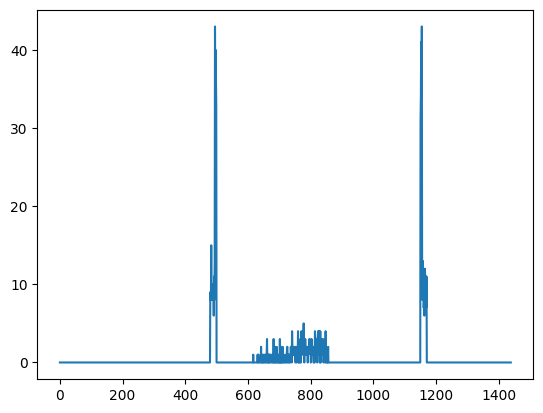

In [21]:

show_logon_plot(logon_activities, 'SIB0825')  # Salesman


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<AxesSubplot:>

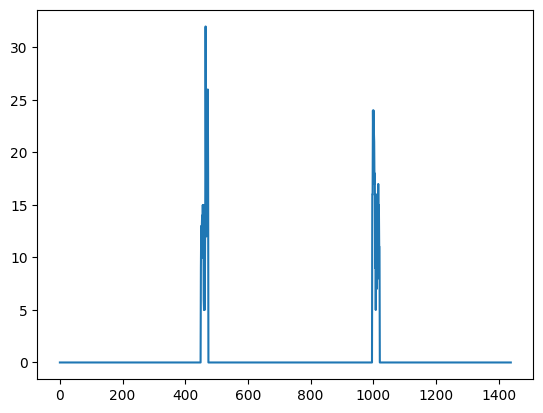

In [22]:
show_logon_plot(logon_activities, 'NIG0433')  # ProductionLineWorker


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<AxesSubplot:>

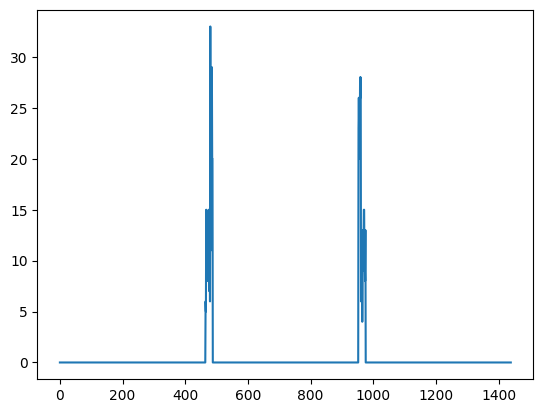

In [23]:
show_logon_plot(logon_activities, 'ALD0521')  # Mathematian


/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<AxesSubplot:>

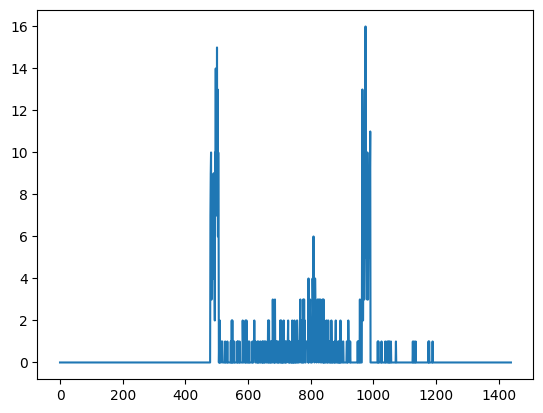

In [25]:
show_logon_plot(logon_activities, 'JCE0258')  # Mathematian
